# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload both the PDF and the ipynb file on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from scipy import signal

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [2]:
def create_padding(input_image, d):

    #TODO
    n, m = input_image.shape
    output_image = np.zeros((n + 2*d, m + 2*d), dtype=input_image.dtype)
    output_image[d:n+d, d:m+d] = input_image

    return output_image
    

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [3]:
def convolution(input_image, kernel):

    #TODO
    n, m = input_image.shape
    k, _ = kernel.shape  # assuming square kernel

    output_height = n - k + 1
    output_width = m - k + 1

    output_image = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            region = input_image[i:i+k, j:j+k]
            output_image[i, j] = np.sum(region * kernel)
    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [4]:
def pooling(input_image, p, pooling_type = "max_pooling"):
    n, m = input_image.shape
    output_height = n - p + 1
    output_width = m - p + 1

    output_image = np.zeros((output_height, output_width))
    if pooling_type == "max_pooling":

        #TODO
        for i in range(output_height):
            for j in range(output_width):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.max(region)

    elif pooling_type == "avg_pooling":

        #TODO
        for i in range(output_height):
            for j in range(output_width):
                region = input_image[i:i+p, j:j+p]
                output_image[i, j] = np.mean(region)
        pass

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

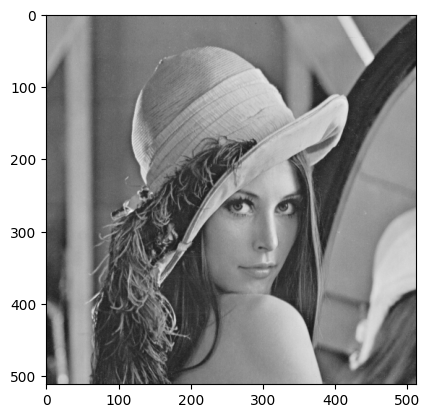

In [5]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

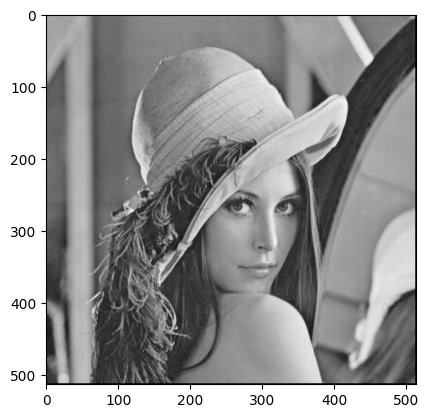

(514, 514)


In [6]:
padded_image = create_padding(np.array(load_img('lena.gif', color_mode='grayscale')), 1)  # Or 'rgb' if needed
# lena = img_to_array(lena).squeeze()  # Remove singleton channel dimension if grayscale
plt.imshow(padded_image, cmap='gray')
plt.show()
print(padded_image.shape)

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution and pooling separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

The following outputs are expected:
1. lena kernel 1 convolution and then max pooled, set your output to the variable lena_kernel_1_maxpool.
2. lena kernel 2 convolution and then average pooled, set your output to the variable lena_kernel_2_avgpool.
3. lena kernel 3 convolution and then max pooled, set your output to the variable lena_kernel_3_maxpool.
4. lena kernel 4 convolution and then average pooled, set your output to the variable lena_kernel_4_avgpool.

In [7]:
#TODO
#Write code to use your convolution and pooling methods.

kernel_1 = np.array([[+1, 0, -1],
                     [+1, 0, -1],
                     [+1, 0, -1]])

kernel_2 = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [+1, +1, +1]])

kernel_3 = np.array([[-1, 0, +1],
                     [-2, 0, +2],
                     [-1, 0, +1]])

kernel_4 = np.array([[+1, +2, +1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

kernel_5 = np.array([[0, -1, 0],
                     [-1, +4, -1],
                     [0, -1, 0]])

def normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))
# padded_image = normalize(padded_image)  # Normalize the image if needed

convolution_result_1 = convolution(padded_image, kernel_1)
convolution_result_2 = convolution(padded_image, kernel_2)
convolution_result_3 = convolution(padded_image, kernel_3)
convolution_result_4 = convolution(padded_image, kernel_4)
convolution_result_5 = convolution(padded_image, kernel_5)
lena_kernel_1_maxpool = pooling(convolution_result_1, 2, pooling_type="max_pooling")
lena_kernel_2_avgpool = pooling(convolution_result_2, 2, pooling_type="avg_pooling")
lena_kernel_3_maxpool = pooling(convolution_result_3, 2, pooling_type="max_pooling")
lena_kernel_4_avgpool = pooling(convolution_result_4, 2, pooling_type="avg_pooling")
lena_kernel_5_maxpool = pooling(convolution_result_5, 2, pooling_type="max_pooling")

In [8]:
to_be_polted_conv = []
to_be_polted_conv.append(convolution_result_1)
to_be_polted_conv.append(convolution_result_2)
to_be_polted_conv.append(convolution_result_3)
to_be_polted_conv.append(convolution_result_4)
to_be_polted_conv.append(convolution_result_5)

to_be_plotted_pool = []
to_be_plotted_pool.append(lena_kernel_1_maxpool)
to_be_plotted_pool.append(lena_kernel_2_avgpool)
to_be_plotted_pool.append(lena_kernel_3_maxpool)
to_be_plotted_pool.append(lena_kernel_4_avgpool)
to_be_plotted_pool.append(lena_kernel_5_maxpool)

<font color='blue'>Explain what each of the above kernels (including your choice) will do to the image.</font>

In [9]:
#Write your answers as a string (max 2 sentences per kernel)

Ans_Kernel_1 = "Kernel 1 detects vertical edges by highlighting regions with horizontal intensity changes. After max pooling, only the strongest vertical edges are preserved."
Ans_Kernel_2 = "Kernel 2 detects horizontal edges by responding to vertical intensity changes. Average pooling smoothens the edge transitions, reducing noise."
Ans_Kernel_3 = "Kernel 3 is the Sobel operator for vertical edges, emphasizing fine vertical structures. Max pooling retains the most prominent vertical gradients."
Ans_Kernel_4 = "Kernel 4 is the Sobel operator for horizontal edges, enhancing horizontal details. Average pooling produces a smoother representation of these edges."
Ans_Kernel_5 = "Lernel 5 is the Laplacian operator, which detects areas of rapid intensity change, highlighting edges and fine details. Max pooling retains the most significant features, emphasizing strong edges in the image."

Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

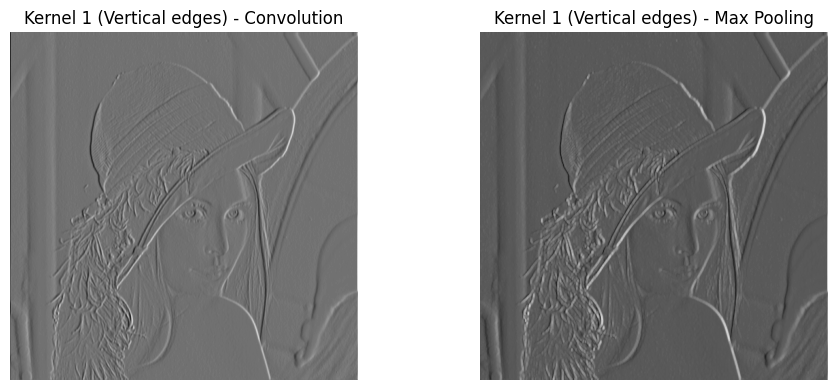

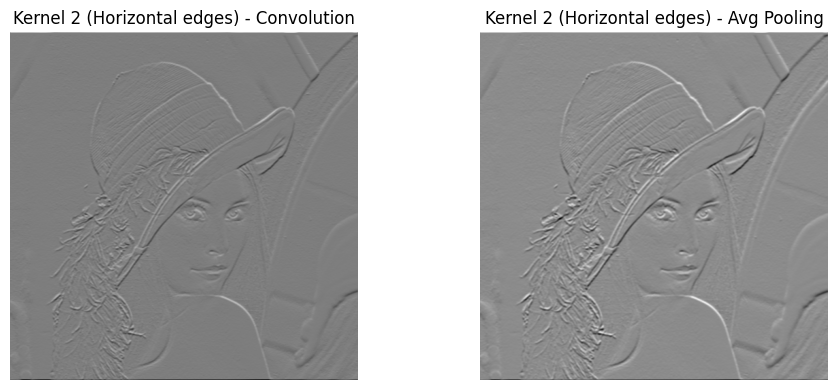

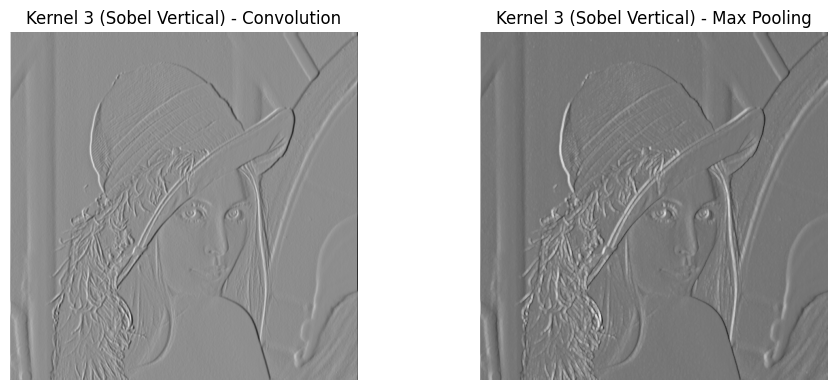

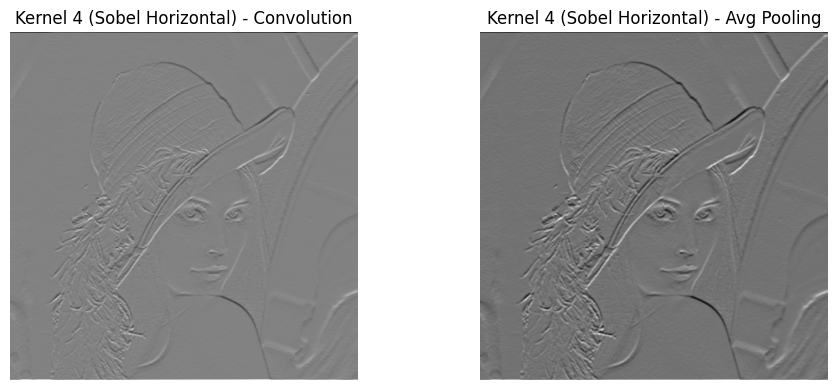

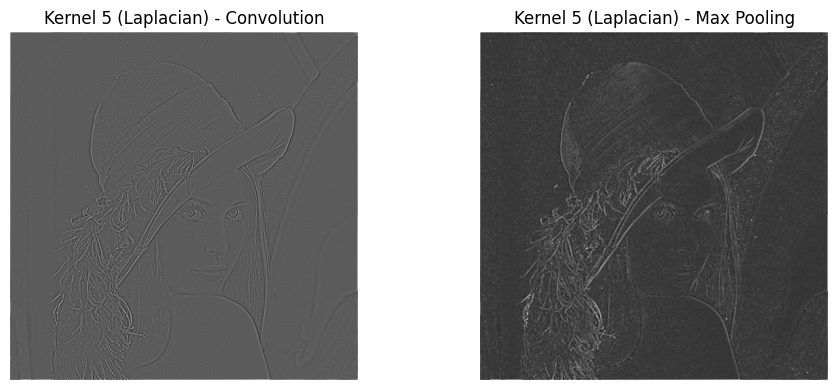

In [10]:

pooling_types = ["max_pooling", "avg_pooling", "max_pooling", "avg_pooling", "max_pooling"]
titles = [
    "Kernel 1 (Vertical edges)",
    "Kernel 2 (Horizontal edges)",
    "Kernel 3 (Sobel Vertical)",
    "Kernel 4 (Sobel Horizontal)",
    "Kernel 5 (Laplacian)"
]

lena_gray = np.array(lena.convert('L'))  # Convert to grayscale
# lena_gray = lena_gray / 255.0  # Normalize pixel values to [0, 1]

for i in range(5):

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(to_be_polted_conv[i], cmap='gray')
    plt.title(f'{titles[i]} - Convolution')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(to_be_plotted_pool[i], cmap='gray')
    plt.title(f'{titles[i]} - {pooling_types[i].replace("_", " ").title()}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to **build the structure of your model appropriately using keras**. I have provided only the code to download the cifar10 dataset. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

**Final expected outcome:** For the best CNN model architecture and parameters you find, **your model is required to be able to provide accurate predictions**. The **accuracy rate will determine your score**. For this **implement a predict function** - instructions given below.

Hint: To improve your model you may use the following techniques. 
1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [12]:
#TODO
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values
x_train=np.concatenate((x_train[:10000], x_test,x_test,x_test), axis=0)
y_train=np.concatenate((y_train[:10000], y_test,y_test,y_test), axis=0)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
class_Names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [15]:
from tensorflow.keras.initializers import HeNormal

he_init = HeNormal()

In [16]:
# Define the simplified CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), kernel_initializer=he_init),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer=he_init),
    MaxPooling2D((2,2)),
    # Dropout(0.2),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    # Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

test_model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='valid', input_shape=(32,32,3), kernel_initializer=he_init),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu', padding='valid', kernel_initializer=he_init),
    BatchNormalization(),
    # Dropout(0.2),
    Conv2D(64, (3,3), activation='relu', padding='valid', kernel_initializer=he_init),
    BatchNormalization(),
    # Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=he_init),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model = test_model

# Compile with optimized learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0004),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Simplified data augmentation
datagen = ImageDataGenerator(horizontal_flip=True)

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=2, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    # x_train, y_train,
    # batch_size=1024,
    epochs=5,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr, early_stop],
    verbose=1
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.4006 - loss: 1.7918 - val_accuracy: 0.2631 - val_loss: 2.2639 - learning_rate: 4.0000e-04
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.6283 - loss: 1.0661 - val_accuracy: 0.6530 - val_loss: 1.0089 - learning_rate: 4.0000e-04
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7223 - loss: 0.8108 - val_accuracy: 0.7221 - val_loss: 0.8273 - learning_rate: 4.0000e-04
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 93ms/step - accuracy: 0.7953 - loss: 0.6275 - val_accuracy: 0.7768 - val_loss: 0.6977 - learning_rate: 4.0000e-04
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.8550 - loss: 0.4713 - val_accuracy: 0.7880 - val_loss: 0.6685 - learning_rate: 4.0000e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9044 - loss: 0.3388
Test accuracy: 0.9017999768257141


In [17]:
#In this cell define the function predict, which will predict the class of test_images using your best CNN-model.
#The output should be a python list of strings of classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
#Your work will be mainly evaluated based on this.
#The grader will test it against input images and your score will be determined based on the number of correct predictions. 
#Expect the input to be a torch tensor of shape [64, 3, 32, 32]

def predict(test_images):

    #TODO
    test_images = test_images.numpy()  # Convert tensor to numpy array
    test_images = np.transpose(test_images, (0, 2, 3, 1))  # Change shape from [64, 3, 32, 32] to [64, 32, 32, 3]
    prediction = model.predict(test_images)  # Get predictions from the model
    
    prediction_index = np.argmax(prediction, axis=1)  # Get the index of the highest probability class
    
    predictions = [class_Names[i] for i in prediction_index]  # Map indices to class names
    
    return predictions

In [18]:
# Select the first 64 images and their true labels
no = 10000
sample_test_images = x_test[:no]
true_labels = y_test[:no].flatten()  # Flatten to ensure a 1D array of labels

# Predict probabilities for the selected images
probabilities = model.predict(sample_test_images)  # Normalize images to [0,1]

# Determine the predicted class for each image
predicted_classes = np.argmax(probabilities, axis=1)

# Define the class names (e.g., for CIFAR-10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Map true and predicted labels to class names
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_classes]

# Calculate accuracy on these 64 samples
accuracy = np.mean(predicted_classes == true_labels)
print(f"Accuracy on these {no} samples: {accuracy:.2f}")

# # Create a figure with an 8x8 grid of subplots
# fig, axes = plt.subplots(8, 8, figsize=(16, 16))
# axes = axes.flatten()

# # Plot each image with its true and predicted labels
# for i, ax in enumerate(axes):
#     ax.imshow(sample_test_images[i])  # Display the image
#     true_label = true_class_names[i]
#     pred_label = predicted_class_names[i]
#     confidence = np.max(probabilities[i])  # Confidence score is the max probability
#     # Set title color: green for correct, red for incorrect
#     color = 'green' if true_labels[i] == predicted_classes[i] else 'red'
#     ax.set_title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}", 
#                  color=color, fontsize=8)
#     ax.axis('off')  # Hide axes for clarity

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Accuracy on these 10000 samples: 0.90
